# Economic Indicators and Speech sentiment.

After an initial foray into the market indicators, it was onto look into the less granular indicators.

Namely: CPI, GDP, Unemployment, and Wage growth.

The purpose of this notebook is to try and find any correlation or possibly causation between all the economic indicators above and the speeches made.

The output consists of multiple plots for economic indicators at different time frames, as well as for all the speeches, and also grouped into the Governor's speeches solely. It groups speeches into either positive or negative polarity and attempts to visualise any correlation between economic indicators and the speech sentiment at the time. 

In [67]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Suppress all warnings
warnings.filterwarnings("ignore")

In [68]:
# Import file
all_data = pd.read_csv('all_data.csv')

# View the dataframe
all_data

,date,reference,country,title,author,is_gov,word_count,body,central_bank,year,...,ftse_100,gdp_million,gold_price,avg_house_price,1_mo_bond,10_yr_bond,2_yr_bond,unemployment,usd,wage_growth
0,1999-01-04,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,5879.399902,255773,289,72903.17681,6.023,4.287,4.899,6.2,1.6585,NaN
1,1999-01-05,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,5958.200195,255773,289,72903.17681,6.022,4.330,4.895,6.2,1.6542,NaN
2,1999-01-06,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,6148.799805,255773,290,72903.17681,6.022,4.319,4.917,6.2,1.6549,NaN
3,1999-01-07,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,6101.200195,255773,293,72903.17681,6.022,4.277,4.941,6.2,1.6520,NaN
4,1999-01-08,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,6147.200195,255773,293,72903.17681,6.019,4.252,4.810,6.2,1.6423,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,2022-10-14,r221012a_BOE,United Kingdom,Monetary policy: an anchor in challenging times,Pill,False,3567,BOE,Bank of England,2022,...,6858.799805,645805,1649,291193.00000,2.208,4.323,3.877,3.8,1.1170,6.6
6122,2022-10-17,r221015a_BOE,United Kingdom,Monetary policy and financial stability interv...,Bailey,True,1767,BOE,Bank of England,2022,...,6920.200195,645805,1664,291193.00000,2.106,3.981,3.559,3.8,1.1353,6.6
6123,2022-10-18,r221015a_BOE,United Kingdom,Monetary policy and financial stability interv...,Bailey,True,1767,BOE,Bank of England,2022,...,6936.700195,645805,1656,291193.00000,2.329,3.943,3.547,3.8,1.1318,6.6
6124,2022-10-19,r221019a_BOE,United Kingdom,Governance of â€œDecentralisedâ€ Finance: Get...,Wilkins,False,5382,BOE,Bank of England,2022,...,6925.000000,645805,1634,291193.00000,2.292,3.871,3.465,3.8,1.1214,6.6


In [69]:
# Convert the date column to datetime
all_data['date'] = pd.to_datetime(all_data['date'])

# View the dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6126 entries, 0 to 6125
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              6126 non-null   datetime64[ns]
 1   reference         6126 non-null   object        
 2   country           6126 non-null   object        
 3   title             6126 non-null   object        
 4   author            6126 non-null   object        
 5   is_gov            6126 non-null   bool          
 6   word_count        6126 non-null   int64         
 7   body              6126 non-null   object        
 8   central_bank      6126 non-null   object        
 9   year              6126 non-null   int64         
 10  language          6126 non-null   object        
 11  vader_polarity    6126 non-null   float64       
 12  lm_polarity       6126 non-null   float64       
 13  finbert_polarity  6126 non-null   float64       
 14  boe_speech        6126 n

In [70]:
# Create a new dataframe with only GDP, CPI, Unemployment and Wage growth.
eco_monthly = all_data[['date', 'cpi', 'unemployment', 'wage_growth', 'gdp_million', 'finbert_polarity']]

# View the dataframe
eco_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6126 entries, 0 to 6125
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              6126 non-null   datetime64[ns]
 1   cpi               6126 non-null   float64       
 2   unemployment      6126 non-null   float64       
 3   wage_growth       5620 non-null   float64       
 4   gdp_million       6126 non-null   int64         
 5   finbert_polarity  6126 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 287.3 KB


Since the wage growth data is available only from 2001, the initial figure was inserted into the NaN values for the preceding years. Given the broad time range under consideration and the focus on analyzing the Global Financial Crisis (GFC), these missing figures should not impede any assumptions made.

In [71]:
# Fill NaN values at the start of the peiod with the oldest collated figure
eco_monthly['wage_growth'] = eco_monthly['wage_growth'].fillna(value=3.6)

# Set 'date' as the index
eco_monthly.set_index('date', inplace=True)

# View the dataframe
eco_monthly

,cpi,unemployment,wage_growth,gdp_million,finbert_polarity
date,,,,,
1999-01-04,1.6,6.2,3.6,255773,-0.007072
1999-01-05,1.6,6.2,3.6,255773,-0.007072
1999-01-06,1.6,6.2,3.6,255773,-0.007072
1999-01-07,1.6,6.2,3.6,255773,-0.007072
1999-01-08,1.6,6.2,3.6,255773,-0.007072
...,...,...,...,...,...
2022-10-14,11.1,3.8,6.6,645805,-0.011488
2022-10-17,11.1,3.8,6.6,645805,-0.070586
2022-10-18,11.1,3.8,6.6,645805,-0.070586


In [72]:
# Filter the DataFrame for the specified GFC date range
eco_monthly_fc = eco_monthly.loc['2007-06-01':'2010-01-31']

# View the dataframe
eco_monthly_fc

,cpi,unemployment,wage_growth,gdp_million,finbert_polarity
date,,,,,
2007-06-01,2.4,5.4,4.2,389228,-0.049606
2007-06-04,2.4,5.4,4.2,389228,-0.049606
2007-06-05,2.4,5.4,4.2,389228,-0.049606
2007-06-06,2.4,5.4,4.2,389228,-0.049606
2007-06-07,2.4,5.4,4.2,389228,-0.049606
...,...,...,...,...,...
2010-01-26,3.5,8.0,1.8,396113,-0.111540
2010-01-27,3.5,8.0,1.8,396113,0.192988
2010-01-27,3.5,8.0,1.8,396113,-0.054856


In [73]:
# Import speeches file.
speeches = pd.read_csv('all_speeches_scores_daily.csv')

# View the dataframe
speeches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8917 entries, 0 to 8916
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              8917 non-null   object 
 1   reference         8917 non-null   object 
 2   country           8917 non-null   object 
 3   title             8917 non-null   object 
 4   author            8917 non-null   object 
 5   is_gov            8917 non-null   bool   
 6   word_count        8917 non-null   int64  
 7   Body              8917 non-null   object 
 8   central_bank      8917 non-null   object 
 9   year              8917 non-null   int64  
 10  language          8917 non-null   object 
 11  vader_polarity    8917 non-null   float64
 12  lm_polarity       8917 non-null   float64
 13  finbert_polarity  8917 non-null   float64
dtypes: bool(1), float64(3), int64(2), object(8)
memory usage: 914.5+ KB


In [74]:
# Convert the date column to datetime
speeches['date'] = pd.to_datetime(speeches['date'])

# View the dataframe
speeches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8917 entries, 0 to 8916
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              8917 non-null   datetime64[ns]
 1   reference         8917 non-null   object        
 2   country           8917 non-null   object        
 3   title             8917 non-null   object        
 4   author            8917 non-null   object        
 5   is_gov            8917 non-null   bool          
 6   word_count        8917 non-null   int64         
 7   Body              8917 non-null   object        
 8   central_bank      8917 non-null   object        
 9   year              8917 non-null   int64         
 10  language          8917 non-null   object        
 11  vader_polarity    8917 non-null   float64       
 12  lm_polarity       8917 non-null   float64       
 13  finbert_polarity  8917 non-null   float64       
dtypes: bool(1), datetime64[n

The all_data file has all the FinBERT polarity scores forward filled, creating speech data for every day. Upon importing the all_speeches_scores_daily.csv file, which contains finalized NLP polarity scores, to compile monthly averages later, a dataframe containing only the specific speech dates will be required.

Firstly, lets have a look at the four economic indicators along with the FinBERT speech polarity scores in the GFC period which was designated as June 2007 until Jan 2010.

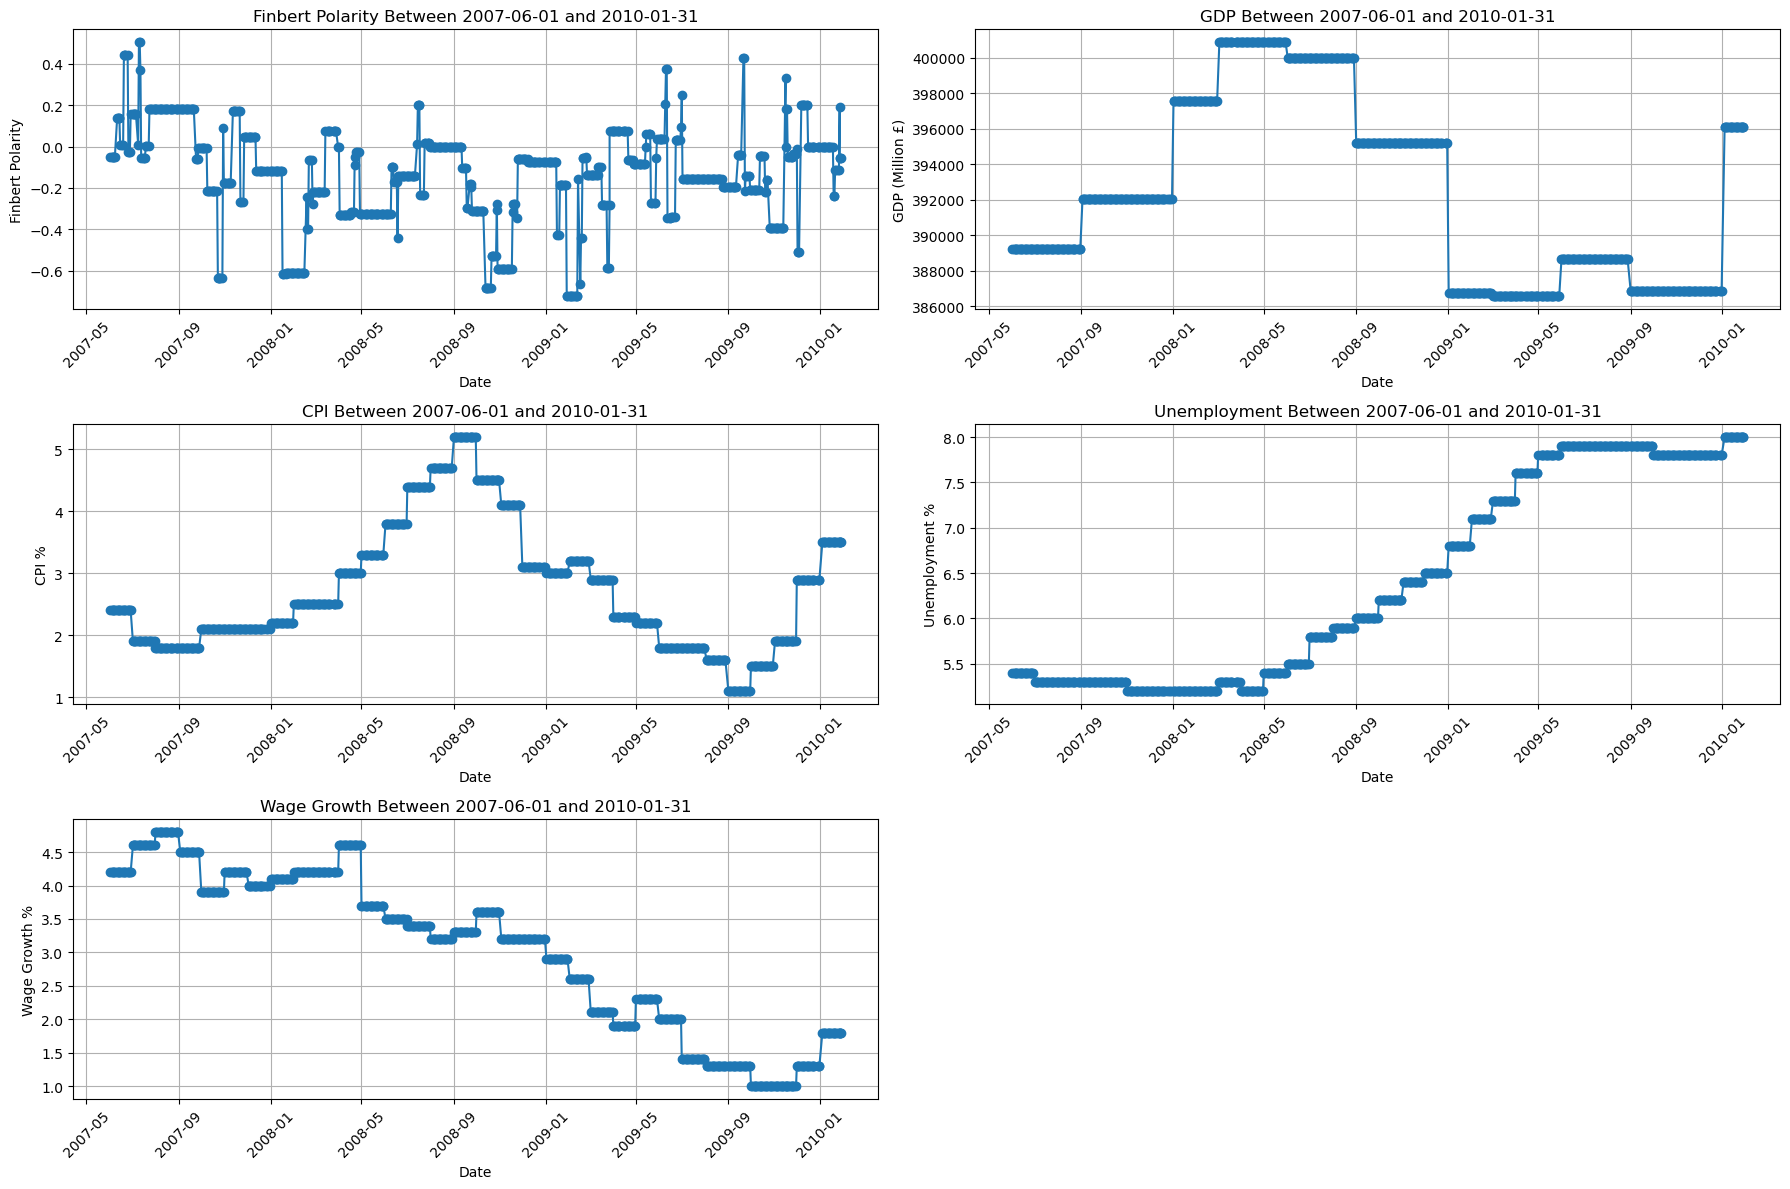

In [75]:
# Filter dataframe based on date range
date_range_start = '2007-06-01'
date_range_end = '2010-01-31'
df_filtered = eco_monthly_fc.loc[date_range_start:date_range_end]

# Create figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

# Plot finbert_polarity
axes[0, 0].plot(df_filtered.index, df_filtered['finbert_polarity'], marker='o', linestyle='-')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Finbert Polarity')
axes[0, 0].set_title('Finbert Polarity Between 2007-06-01 and 2010-01-31')
axes[0, 0].grid(True)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot GDP
axes[0, 1].plot(df_filtered.index, df_filtered['gdp_million'], marker='o', linestyle='-')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('GDP (Million £)')
axes[0, 1].set_title('GDP Between 2007-06-01 and 2010-01-31')
axes[0, 1].grid(True)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot CPI
axes[1, 0].plot(df_filtered.index, df_filtered['cpi'], marker='o', linestyle='-')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('CPI %')
axes[1, 0].set_title('CPI Between 2007-06-01 and 2010-01-31')
axes[1, 0].grid(True)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot Unemployment
axes[1, 1].plot(df_filtered.index, df_filtered['unemployment'], marker='o', linestyle='-')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Unemployment %')
axes[1, 1].set_title('Unemployment Between 2007-06-01 and 2010-01-31')
axes[1, 1].grid(True)
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot Wage growth
axes[2, 0].plot(df_filtered.index, df_filtered['wage_growth'], marker='o', linestyle='-')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Wage Growth %')
axes[2, 0].set_title('Wage Growth Between 2007-06-01 and 2010-01-31')
axes[2, 0].grid(True)
axes[2, 0].tick_params(axis='x', rotation=45)

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

At first glance, the speeches appear to exhibit significant variation, reflecting the turbulence of the period, with a tendency towards negativity. This is unsurprising given the economic conditions of the time.

The CPI rises to well over 5% in the middle of the period but also drops below the 2% goal, indicating a period characterized by both rising and falling inflation, which is quite interesting.

GDP experienced a significant drop during this period, for reasons that are quite obvious.

Unemployment during the period as expected rose consistently.

Inversely, wage growth declined as the job market became saturated with individuals seeking employment, resulting in reduced bargaining power for higher wages.

So, plotting all of them, it doesn't appear to show any significant correlation between the sentiment of the speeches and the movements in the economic indicators.

In [76]:
# Create a new dataframe for speeches with only finbert_polarity
fin_speech = speeches[['date', 'finbert_polarity']]

# View the dataframe
fin_speech

,date,finbert_polarity
0,1998-09-15,-0.269212
1,1998-09-16,-0.269212
2,1998-09-17,-0.269212
3,1998-09-18,-0.269212
4,1998-09-19,-0.269212
...,...,...
8912,2022-10-16,-0.070586
8913,2022-10-17,-0.070586
8914,2022-10-18,-0.070586
8915,2022-10-19,0.000144


In [77]:
# Remove duplicate rows based on 'finbert_polarity' and keep the first date with each unique value
fin_speech_unique = fin_speech.drop_duplicates(subset=['finbert_polarity'], keep='first')

# Set 'date' as the index of the dataframe
fin_speech_unique.set_index('date', inplace=True)

# View the DataFrame
fin_speech_unique

,finbert_polarity
date,
1998-09-15,-0.269212
1998-10-21,0.331056
1998-10-21,-0.638454
1998-11-01,-0.000118
1998-11-01,-0.002259
...,...
2022-10-07,-0.143693
2022-10-12,-0.011488
2022-10-15,-0.070586


Dataframe created with just the speech dates and the corresponing FinBERT polarity scores for a more granular and accurate view.

Focused on extreme positivity or negativity in the speeches, the highest and lowest 20 FinBERT polarity scores from the GFC were grouped together and that netted not a lot of interest. So it was discarded as useful other than to show no correlation.

There doesn't seem to be any pattern indicating that positive speeches correlate with positive economic indicators and negative speeches with negative indicators; they appear to occur independently of each other.

A function was created to compare monthly average FinBERT polarity scores, enabling analysis across various time frames for easier viewing. With the majority of the data being monthly, this ensures consistency. The function enables the exploration of any date.

In [16]:
# Create a function to compare the monthly average FinBERT scores with the economic indicators
def plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date):
    # Filter eco_monthly dataframe by the selected time frame
    eco_monthly_filtered = eco_monthly.loc[start_date:end_date]

    # Calculate the monthly average of finbert_polarity
    monthly_finbert_polarity = fin_speech_unique.resample('M').mean()

    # Reindex monthly_finbert_polarity to include only the dates present between the start and end dates
    monthly_finbert_polarity = monthly_finbert_polarity.reindex(pd.date_range(start=start_date, end=end_date, freq='M'))

    # Resample to the start of each month and take the first value
    monthly_finbert_polarity_resampled = monthly_finbert_polarity.resample('MS').first()

    # Filter monthly_finbert_polarity_resampled to include only the selected time frame
    monthly_finbert_polarity_filtered = monthly_finbert_polarity_resampled.loc[start_date:end_date]

    # Create figures and axes
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # List of columns to plot
    columns_to_plot = ['cpi', 'gdp_million', 'unemployment', 'wage_growth']
    colors = ['blue', 'orange', 'purple', 'black']

    # Define y-axis labels
    y_labels = ['CPI %', 'GDP (million £)', 'Unemployment %', 'Wage growth %']

    # Plot each eco indicator against FinBERT polarity
    for i, (col, color, ax, y_label) in enumerate(zip(columns_to_plot, colors, axs.flatten(), y_labels)):
        ax.plot(eco_monthly_filtered.index, eco_monthly_filtered[col], color=color, label=col)
        ax.set_xlabel('Date')
        ax.set_ylabel(y_label, color=color)

        # Rotate x-axis tick labels by 45 degrees
        ax.tick_params(axis='x', rotation=45)

        # Create secondary y-axis for FinBERT polarity
        ax2 = ax.twinx()
        ax2.set_ylabel('Finbert Polarity')

        # Plot the monthly average FinBERT polarity
        for date, row in monthly_finbert_polarity_filtered.iterrows():
            color = 'skyblue' if row['finbert_polarity'] >= 0 else 'salmon'
            ax2.scatter(date, row['finbert_polarity'], color=color)

    # Add individual plot titles
    axs[0, 0].set_title('CPI')
    axs[0, 1].set_title('GDP')
    axs[1, 0].set_title('Unemployment')
    axs[1, 1].set_title('Wage Growth')

    # Add a common title with a larger font size
    plt.suptitle(f'FinBERT monthly average polarity scores vs Economic indicators for {start_date} to {end_date}', fontsize=16)

    # Adjust the spacing between the main title and subplots
    plt.subplots_adjust(top=0.9)

    # Add legend
    red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='Negative polarity')
    green_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Positive polarity')
    fig.legend(handles=[green_dot, red_dot], loc='upper left', bbox_to_anchor=(1.02, 0.94))

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

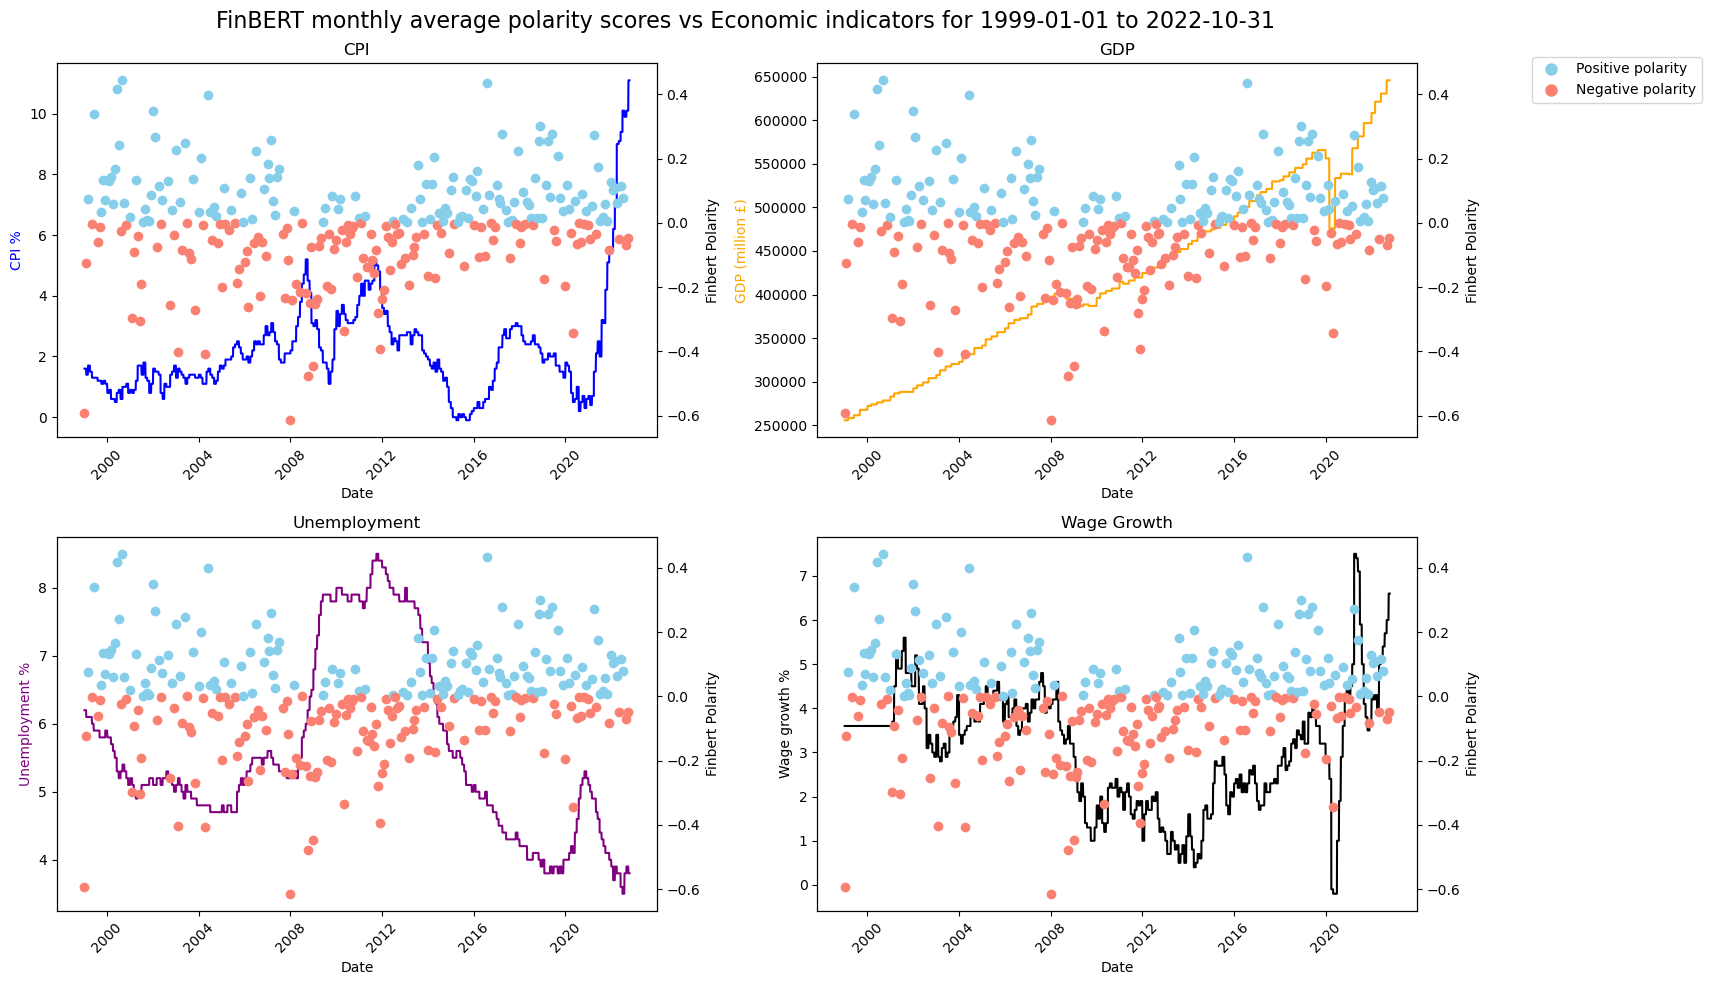

In [17]:
# Set the date range required
start_date = '1999-01-01'
end_date = '2022-10-31'
plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

The data from the whole period of 1999 to 2022 showed around the GFC period and afterwards, the sentiment was generally more negative and around 2016 was more on the positive side. I can't assume the sentiment as being a factor in the changes in the indicators from this though as there is a broad spread of both positive and negative months throughout. The major standout is the high unemployment period in the middle of the plot corresponding to negative sentiment in the speeches.

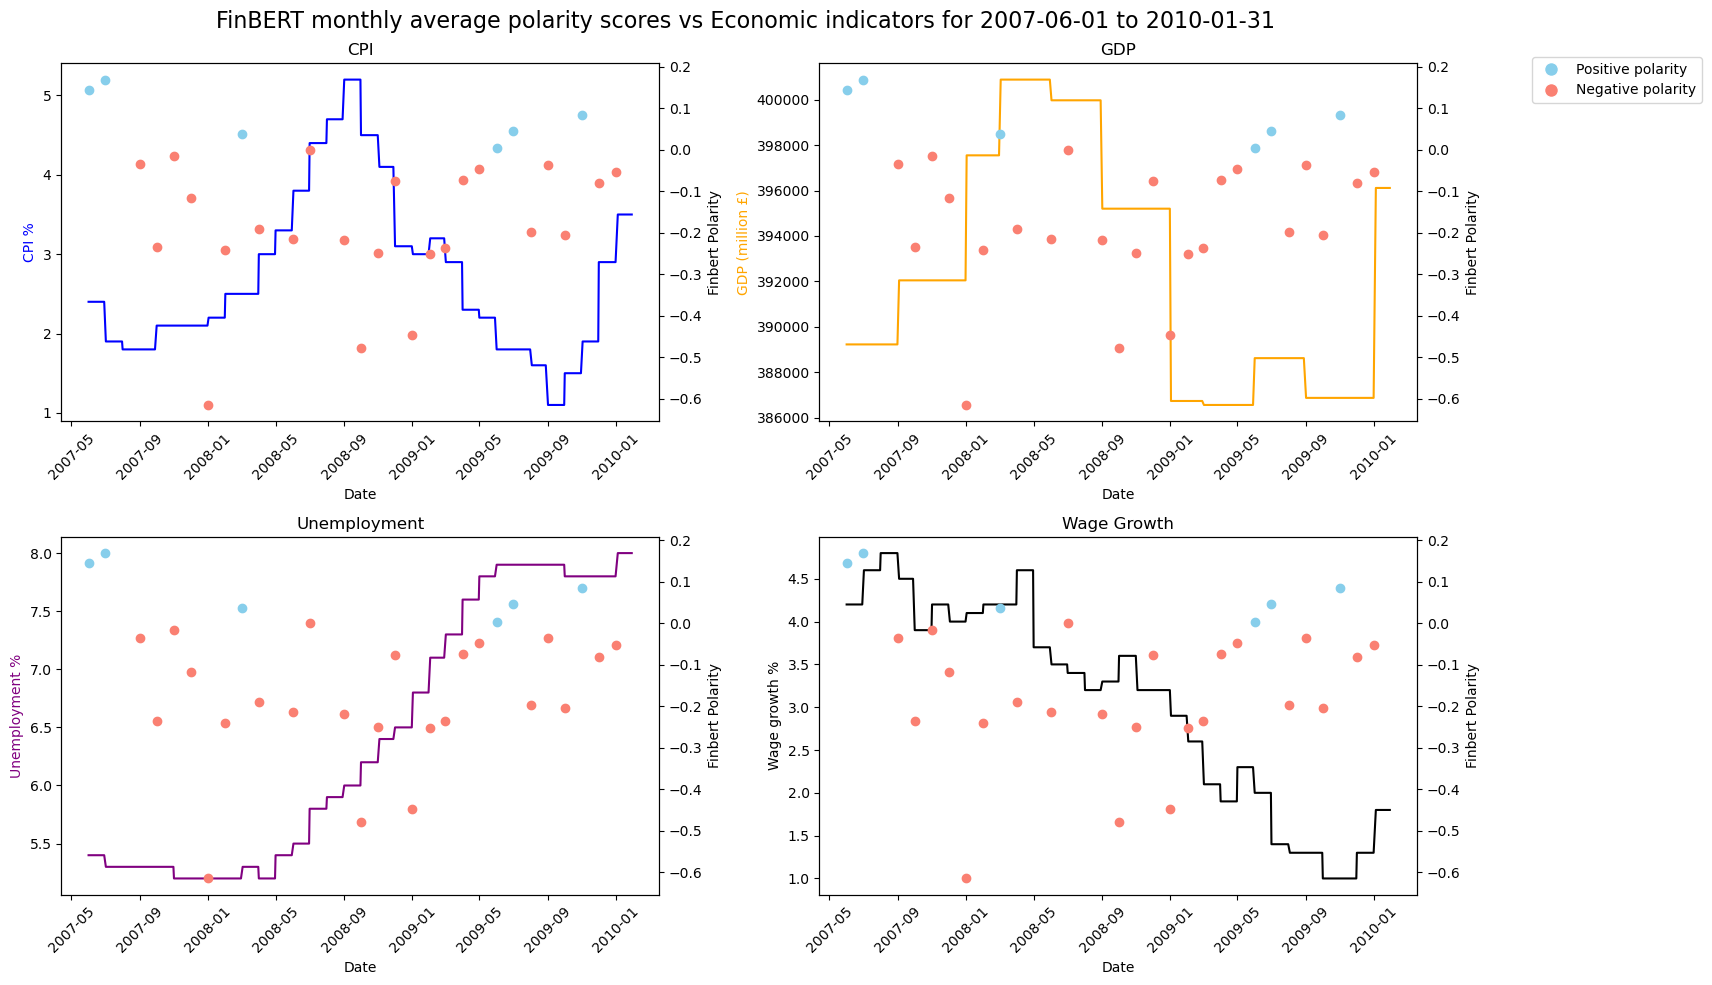

In [19]:
# Set the date range required
start_date = '2007-06-01'
end_date = '2010-01-31'
plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

Looking at the GFC with sentiment overall being negative there still doesn't seem to be any correlation.

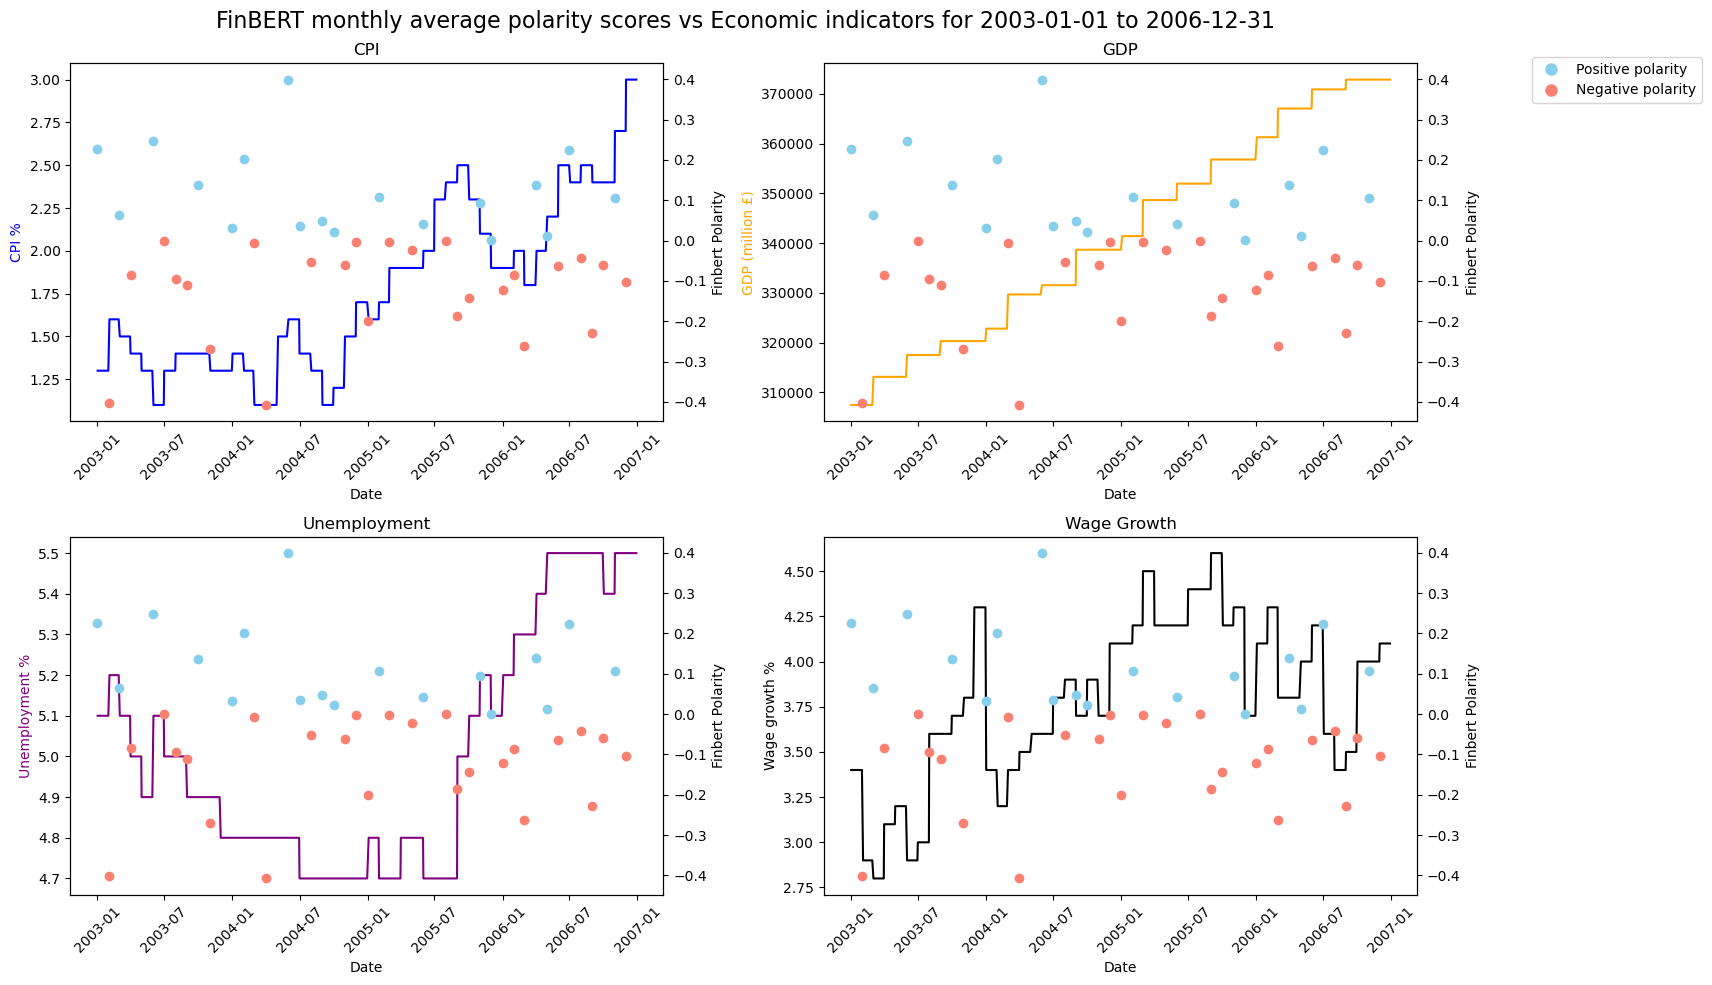

In [21]:
# Set the date range required
start_date = '2003-01-01'
end_date = '2006-12-31'
plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

Termed the Golden Age in our research, this was a period of relative economic stability and growth. It's clear that speeches scored higher more often than the GFC, but there is still an even spread of positive and negative months.

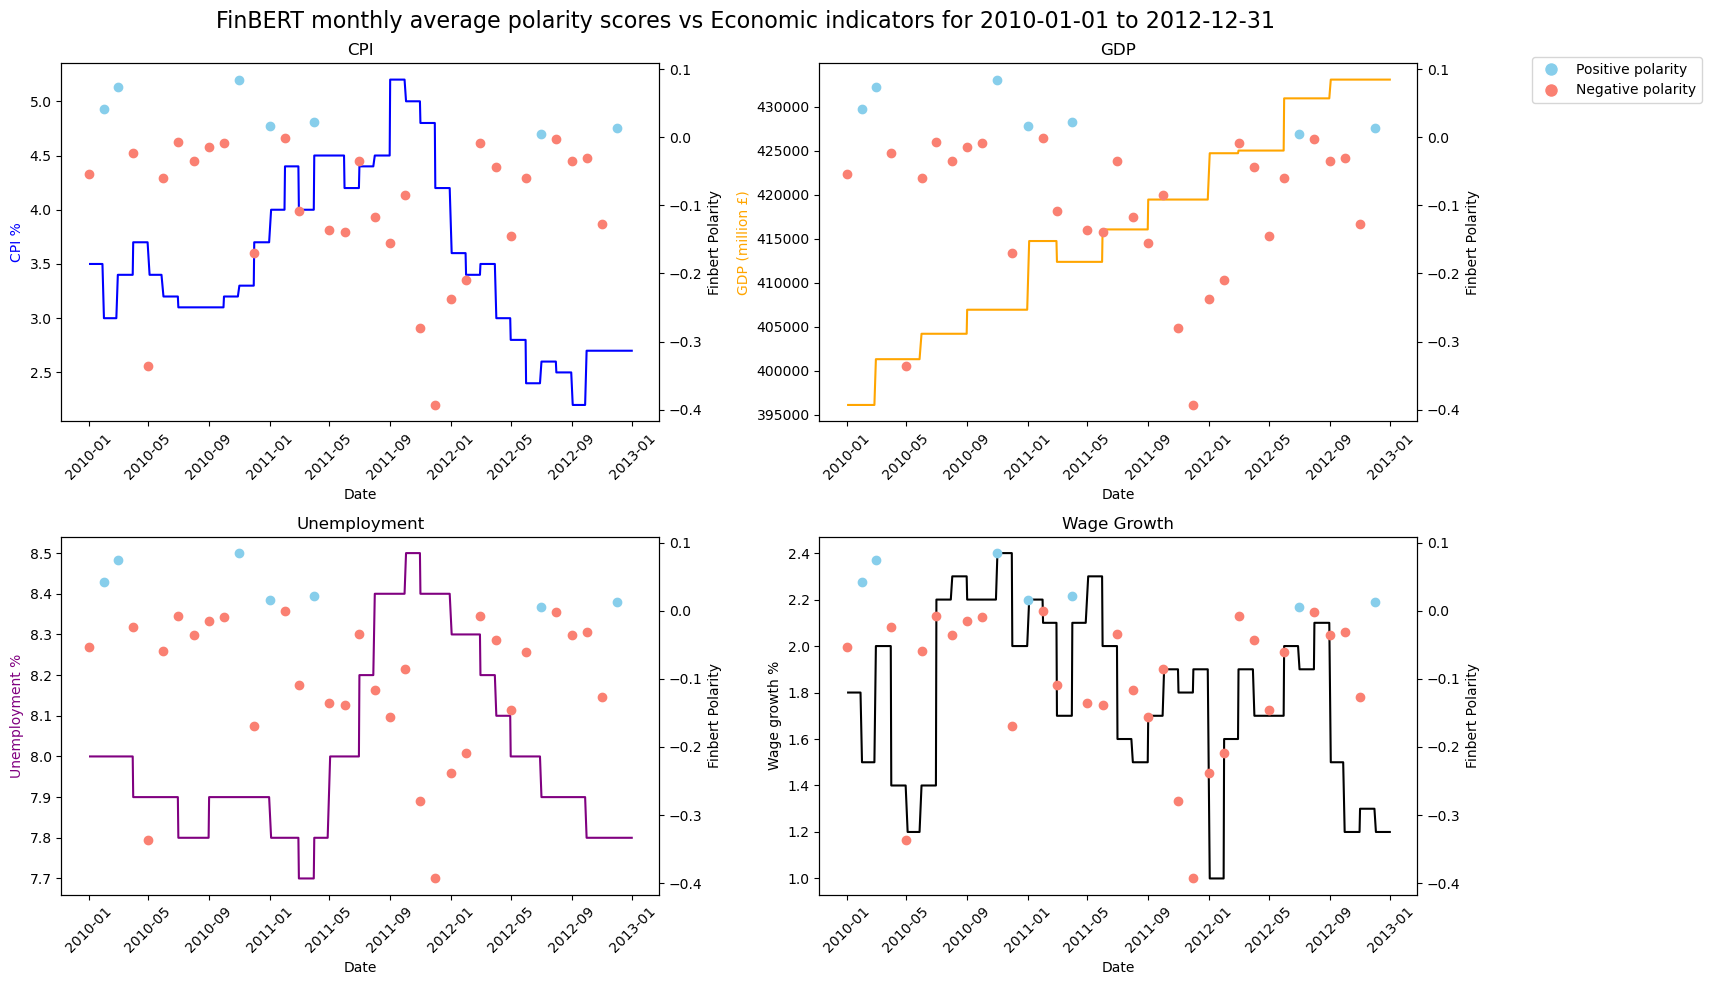

In [23]:
# Set the date range required
start_date = '2010-01-01'
end_date = '2012-12-31'
plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

Lastly, a final look at a period of time we termed the Slough of Despond, where austerity measures were in place in an attempt to reduce the deficit. Certainly, there are more negative months overall, but the majority are not significantly negative. Among them, there are also positive months, and they do not suggest an influence on the indicators.

Furthermore, a function was created to provide a more granular look by displaying individual speeches alongside economic indicators, again allowing the selection of data from any date.

In [25]:
# Create a function to plot the individual speeches with the economic indicators
def plot_all_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date):
    # Filter eco_monthly dataframe by the selected time frame
    eco_monthly_filtered = eco_monthly.loc[start_date:end_date]

    # Filter fin_speech_unique dataframe by the selected time frame
    fin_speech_filtered = fin_speech_unique.loc[start_date:end_date]

    # Create figures and axes
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # List of columns to plot
    columns_to_plot = ['cpi', 'gdp_million', 'unemployment', 'wage_growth']
    colors = ['blue', 'orange', 'purple', 'black']

    # Define y-axis labels
    y_labels = ['CPI %', 'GDP (million £)', 'Unemployment %', 'Wage growth %']

    # Plot each eco indicator against finBERT polarity
    for i, (col, color, ax, y_label) in enumerate(zip(columns_to_plot, colors, axs.flatten(), y_labels)):
        ax.plot(eco_monthly_filtered.index, eco_monthly_filtered[col], color=color, label=col)
        ax.set_xlabel('Date')
        ax.set_ylabel(y_label, color=color)

        # Rotate x-axis tick labels by 45 degrees
        ax.tick_params(axis='x', labelrotation=45)

        # Create secondary y-axis for finBERT polarity
        ax2 = ax.twinx()
        ax2.set_ylabel('Finbert Polarity')

        # Plot all finBERT polarity data points
        for date, row in fin_speech_filtered.iterrows():
            color = 'skyblue' if row['finbert_polarity'] >= 0 else 'salmon'
            ax2.scatter(date, row['finbert_polarity'], color=color)

    # Add individual plot titles
    axs[0, 0].set_title('CPI')
    axs[0, 1].set_title('GDP')
    axs[1, 0].set_title('Unemployment')
    axs[1, 1].set_title('Wage Growth')

    # Add a common title with a larger font size
    plt.suptitle(f'FinBERT polarity speech scores vs Economic indicators for {start_date} to {end_date}', fontsize=16)

    # Adjust the spacing between the main title and subplots
    plt.subplots_adjust(top=0.9)

    # Add legend
    red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='Negative polarity')
    green_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Positive polarity')
    fig.legend(handles=[green_dot, red_dot], loc='upper left', bbox_to_anchor=(1.02, 0.94))

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

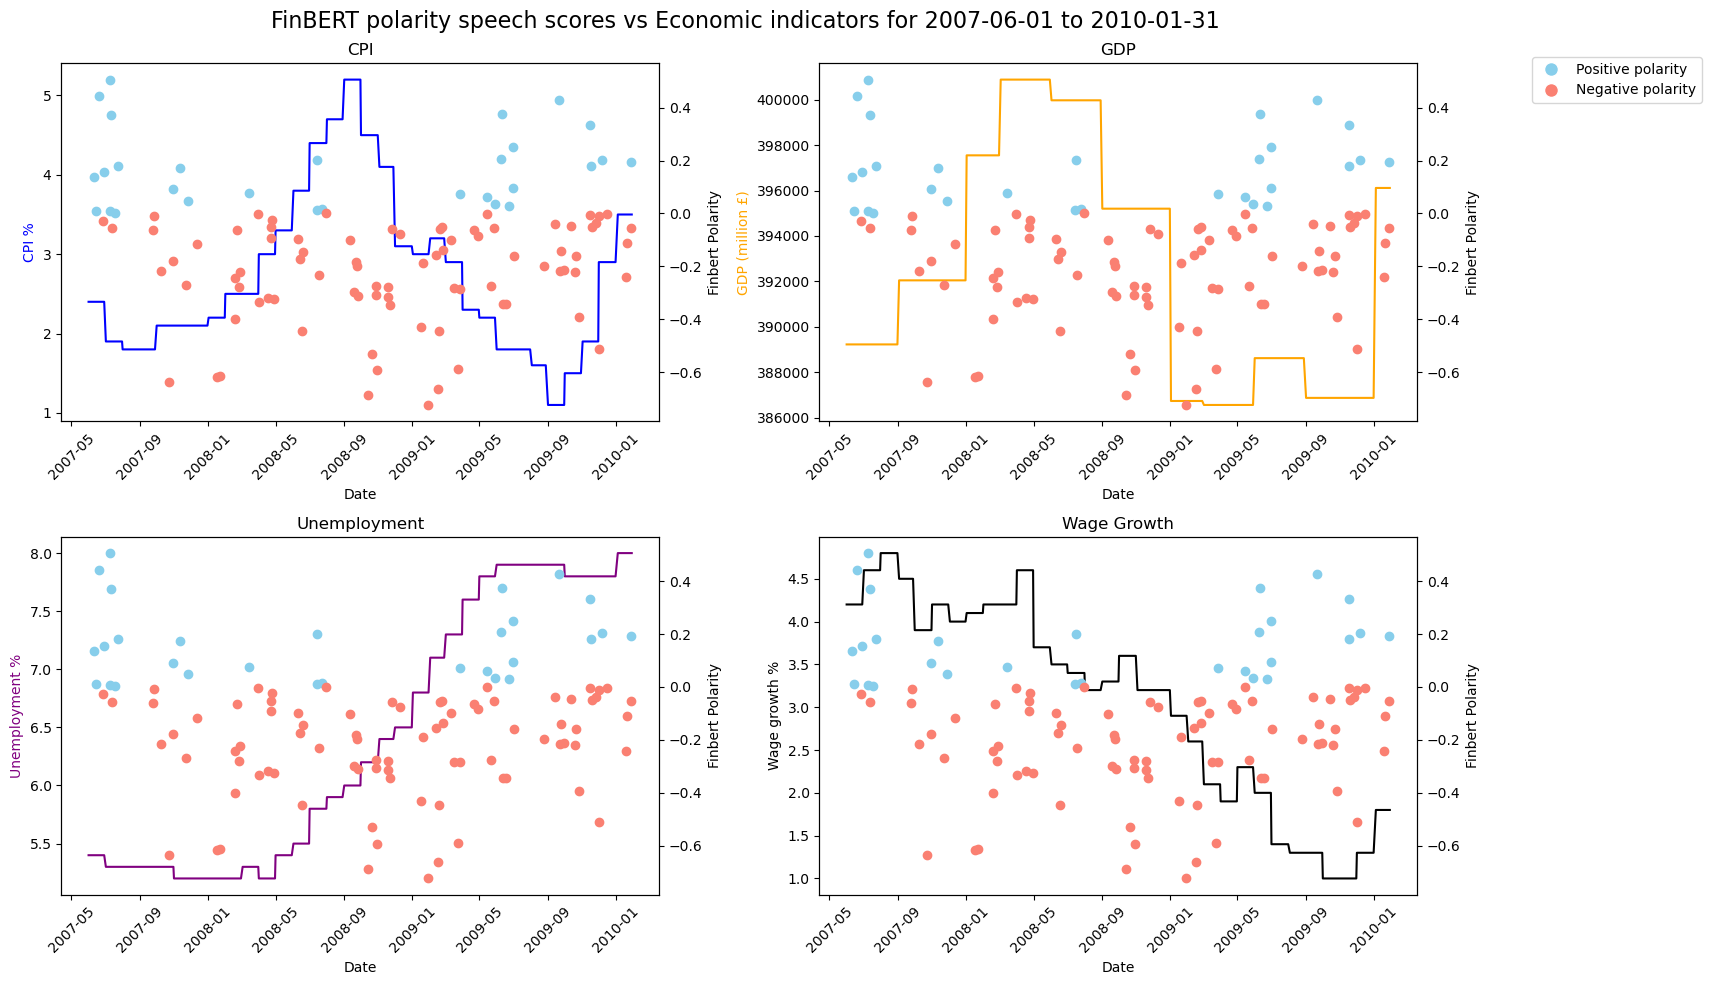

In [26]:
# The GFC
start_date = '2007-06-01'
end_date = '2010-01-31'
plot_all_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

Looking at the GFC again, sentiment is clearly negative. However, with an even spread of positive speeches during that time frame, it's difficult to attribute either end of the sentiment scale to having a corresponding effect on the movement of those indicators.

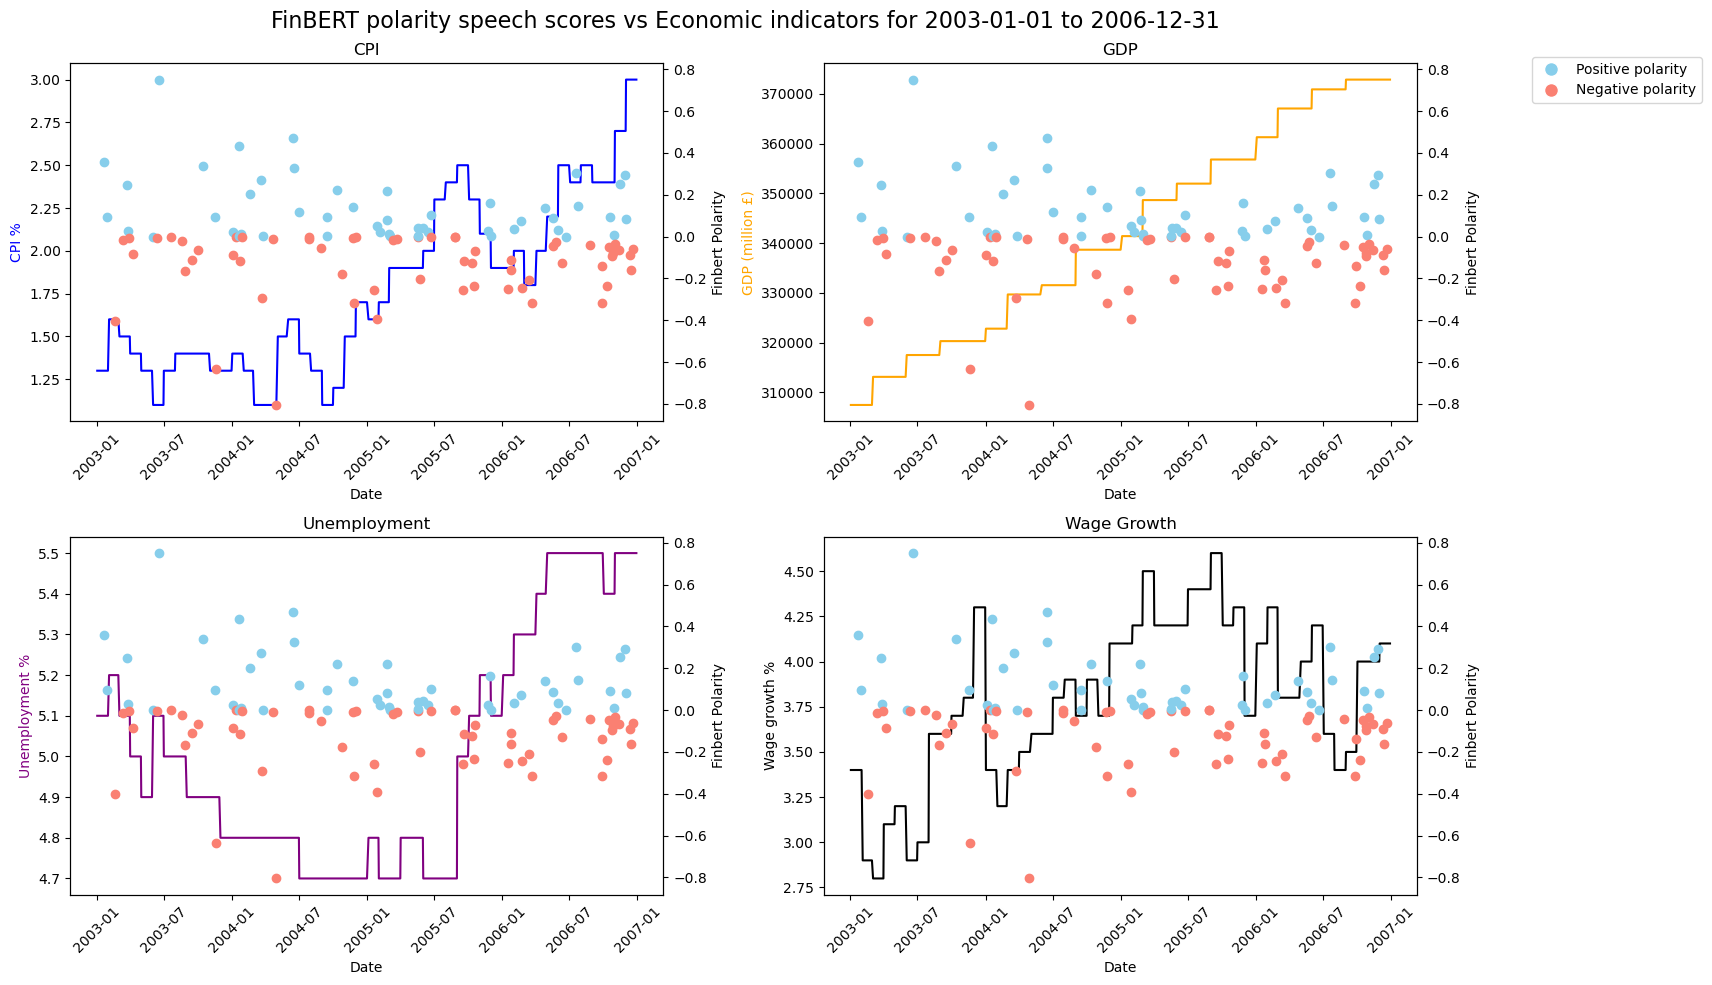

In [28]:
# The Golden Age
start_date = '2003-01-01'
end_date = '2006-12-31'
plot_all_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

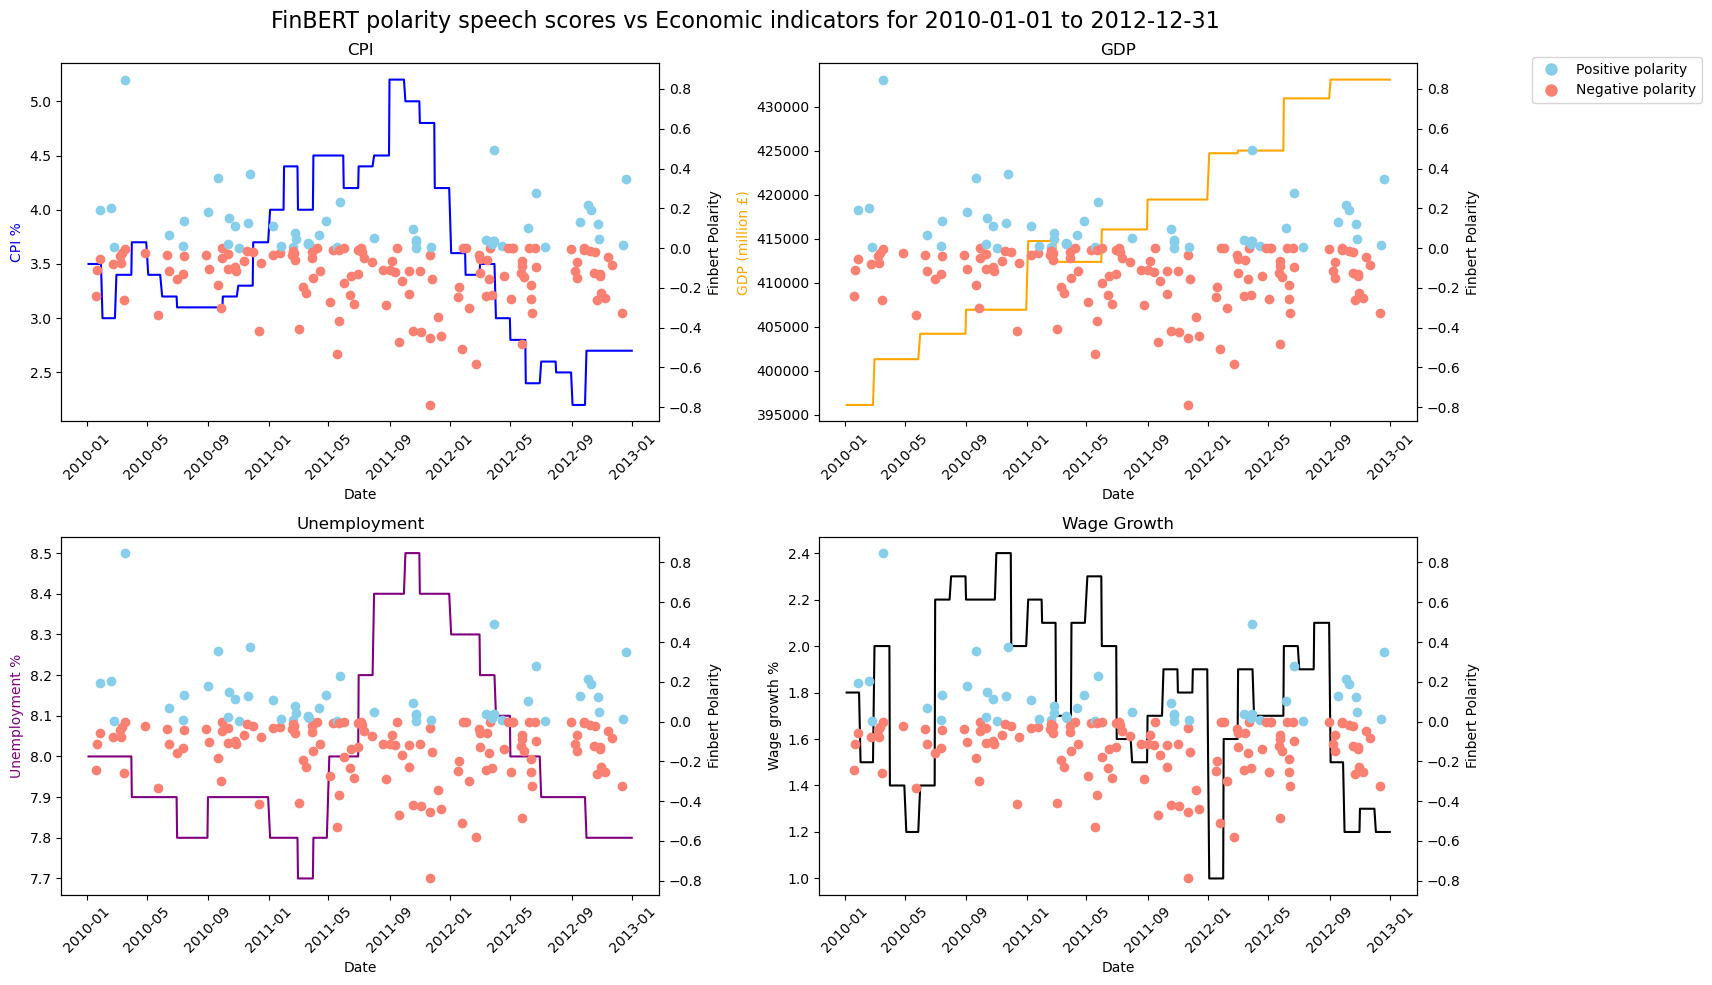

In [30]:
# The Slough of Despond
start_date = '2010-01-01'
end_date = '2012-12-31'
plot_all_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

The three chosen periods all showed speech sentiment on either side of the polarity scales and it's hard to see any pattern of them having a causal effect on the indicators.

To reiterate what the plots all showed, the check for correlation also served to reinforce the assumption that the speech sentiment does not correlate with the economic indicators reviewed. 

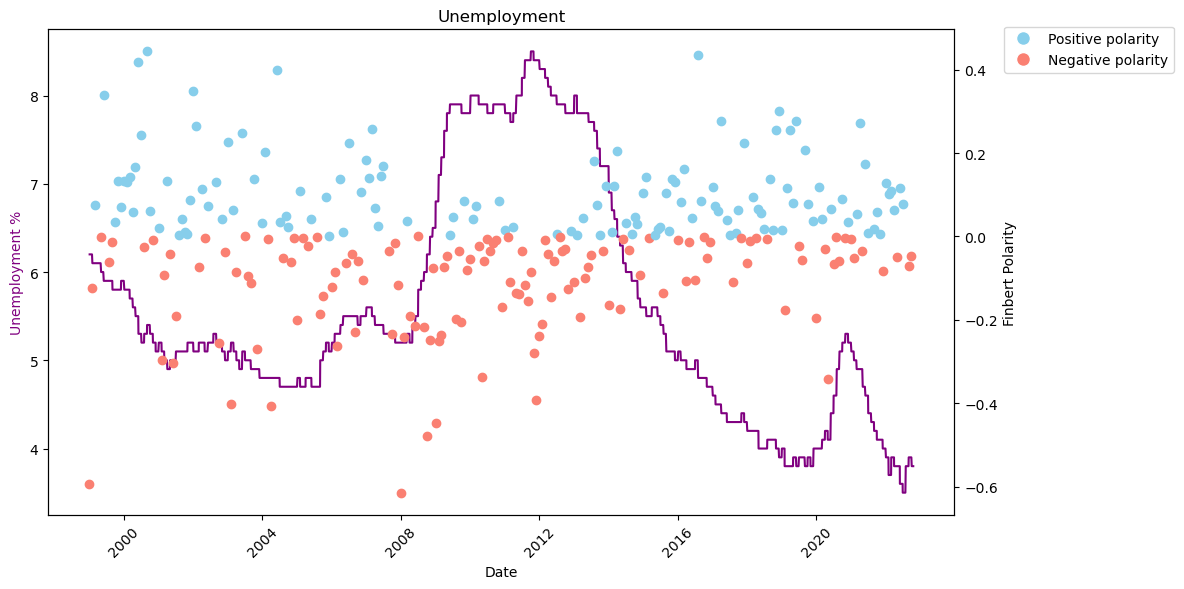

In [66]:
# New version of above code
def plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date):
    # Filter eco_monthly dataframe by the selected time frame
    eco_monthly_filtered = eco_monthly.loc[start_date:end_date]

    # Calculate the monthly average of finbert_polarity
    monthly_finbert_polarity = fin_speech_unique.resample('M').mean()

    # Reindex monthly_finbert_polarity to include only the dates present between the start and end dates
    monthly_finbert_polarity = monthly_finbert_polarity.reindex(pd.date_range(start=start_date, end=end_date, freq='M'))

    # Resample to the start of each month and take the first value
    monthly_finbert_polarity_resampled = monthly_finbert_polarity.resample('MS').first()

    # Filter monthly_finbert_polarity_resampled to include only the selected time frame
    monthly_finbert_polarity_filtered = monthly_finbert_polarity_resampled.loc[start_date:end_date]

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot Unemployment against FinBERT polarity
    ax.plot(eco_monthly_filtered.index, eco_monthly_filtered['unemployment'], color='purple', label='Unemployment')
    ax.set_xlabel('Date')
    ax.set_ylabel('Unemployment %', color='purple')

    # Rotate x-axis tick labels by 45 degrees
    ax.tick_params(axis='x', rotation=45)

    # Create secondary y-axis for FinBERT polarity
    ax2 = ax.twinx()
    ax2.set_ylabel('Finbert Polarity')

    # Plot the monthly average FinBERT polarity
    for date, row in monthly_finbert_polarity_filtered.iterrows():
        color = 'skyblue' if row['finbert_polarity'] >= 0 else 'salmon'
        ax2.scatter(date, row['finbert_polarity'], color=color)

    # Add individual plot title
    ax.set_title('Unemployment')

    # Add legend
    red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='Negative polarity')
    green_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Positive polarity')
    ax2.legend(handles=[green_dot, red_dot], loc='upper right', bbox_to_anchor=(1.25, 1.02))

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

# Example usage:
plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, '1999-01-01', '2022-10-31')

It was decided that the economic indicator Unemployment would be shown as a plot as it shows the only occasion when sentiment and an economic indicator had some sort of correlation, this was noted in the presentation as to not have been the case the majority of the time. 

## Conclusions

From the analysis conducted over various time frames, both positive and negative, and also with a look at the extreme ends of the FinBERT polarity score speeches, it's shown except for one exception mentioned above that there is no correlation between the sentiment of the speech and the economic indicators CPI, GDP, Unemployment, and Wage growth. 
The movement of these indicators and economic sentiment at the time is therefore more likely to be the reason the speeches are of a certain tone rather than the sentiment of these creating fluctuations. The economic indicators analysed are far more likely to fluctuate due to world events, financial bubbles bursting, or political policy than due to the sentiment of the BoE speech maker.